### Revisit Perception using PyTorch Tensors
Ref: https://lightning.ai/courses/deep-learning-fundamentals/2-0-unit-2-overview/2-6-revisiting-the-perceptron-algorithm/

In [2]:
import torch
from torch import tensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/perception_toydata-truncated.csv')
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [16]:
x_train = tensor(df[['x1', 'x2']].values, dtype=torch.float32)
y_train = tensor(df['label'].values, dtype=torch.float32)

#### Implement the Model

In [24]:
class Perception_withTensor:
    
    def __init__(self, n_features: int):
        self.n_features = n_features
        self.weights = torch.zeros(n_features, dtype=torch.float32)
        self.bias = tensor(0.0)

    """Predict output for a single training example
    @param x: represents a single training example. ex [x1, x2, x3, ..., xn]
    @return: 1 if weighted sum > 0, 0 otherwise
    """
    def forward(self, x: tensor) -> tensor:
        weighted_sum = self.bias + torch.dot(self.weights, x)
        return tensor(1.) if weighted_sum > 0 else tensor(0.)
    
    """Update the weights and bias based on the error
    @param x: represents a single training example. ex [x1, x2, x3, ..., xn]
    @param label: represents the label for the training example
    """
    def update(self, x: tensor, label) -> tuple:
        prediction = self.forward(x)
        error = label - prediction
        self.bias += error
        self.weights += error * x
        return prediction, error
    
    def calculate_accuracy(self, y_preds: tensor, y_labels: tensor):
        return torch.sum(y_preds == y_labels) / len(y_labels)

    """Train the model
    @param x_train: list of training examples. ex [[x1, x2, x3, ..., xn], [x1, x2, x3, ..., xn], ...]
    @param y_train: list of labels for training examples. ex [y1, y2, y3, ..., yn]
    @param epochs: number of epochs to train the model
    """
    def train(self, x_train: tensor, y_train: tensor, epochs: int):
        train_hist = {'epochs': [], 'errors': [], 'accuracies': []}

        n = len(y_train)
        for epoch in range(epochs):
            y_preds = np.zeros(n)
            n_errors = 0 # number of errors in this epoch
            for i in range(n):
                pred_i, error_i = self.update(x_train[i], y_train[i])
                y_preds[i] = pred_i
                n_errors += abs(error_i)
            accuracy = self.calculate_accuracy(tensor(y_preds), y_train)

            train_hist['epochs'].append(epoch)
            train_hist['errors'].append(n_errors)
            train_hist['accuracies'].append(accuracy)
            print(f'epoch {epoch}: error = {n_errors}, accuracy = {accuracy}')

        # plot_accuracy(train_hist['epochs'], train_hist['accuracies'])
        self.plot_decision_boundary(x_train, y_train)
        return train_hist
    
    def plot_decision_boundary(self, x_train, y_train):
        plt.figure(figsize=(5,4))
        plt.title('Decision Boundary')
        
        # plot examples
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], marker='o', label='class 0')
        plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], marker='^', label='class 1')

        # plot decision boundary
        x11, x21 = 5, -(self.bias + 5*self.weights[0]) / self.weights[1]
        x12, x22 = -(self.bias + 5*self.weights[1]) / self.weights[0], 5
        plt.plot([x11, x12], [x21, x22], label='Decision Boundary')
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)

        plt.legend()
        plt.grid()
        plt.show()

epoch 0: error = 1.0, accuracy = 0.949999988079071
epoch 1: error = 3.0, accuracy = 0.8500000238418579
epoch 2: error = 1.0, accuracy = 0.949999988079071
epoch 3: error = 0.0, accuracy = 1.0
epoch 4: error = 0.0, accuracy = 1.0
epoch 5: error = 0.0, accuracy = 1.0
epoch 6: error = 0.0, accuracy = 1.0
epoch 7: error = 0.0, accuracy = 1.0
epoch 8: error = 0.0, accuracy = 1.0
epoch 9: error = 0.0, accuracy = 1.0


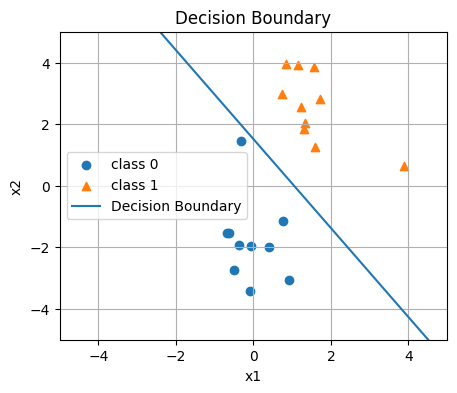

{'epochs': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'errors': [tensor(1.),
  tensor(3.),
  tensor(1.),
  tensor(0.),
  tensor(0.),
  tensor(0.),
  tensor(0.),
  tensor(0.),
  tensor(0.),
  tensor(0.)],
 'accuracies': [tensor(0.9500),
  tensor(0.8500),
  tensor(0.9500),
  tensor(1.),
  tensor(1.),
  tensor(1.),
  tensor(1.),
  tensor(1.),
  tensor(1.),
  tensor(1.)]}

In [25]:
model = Perception_withTensor(2)
model.train(x_train, y_train, epochs=10)